## Setup

In [15]:

import requests
%matplotlib notebook
import logging
from matplotlib import pyplot as plt
from helper import *
from ecdc import VACCINES, COUNTRIES
import pandas as pd
plt.style.use('seaborn-darkgrid')
from ecdc import ECDC
from pprint import pprint
data = ECDC()

# Documented here: https://www.ecdc.europa.eu/sites/default/files/documents/Variable_Dictionary_VaccineTracker-03-2021.pdf

## Data

In [16]:
vax = data.vaccines

vax = vax[vax.TargetGroup=='ALL']
vax.columns

  0%|          | 0/76929 [00:00<?, ?it/s]

  0%|          | 0/76929 [00:00<?, ?it/s]

Index(['YearWeekISO', 'FirstDose', 'FirstDoseRefused', 'SecondDose',
       'UnknownDose', 'NumberDosesReceived', 'Region', 'Population',
       'ReportingCountry', 'TargetGroup', 'Vaccine', 'Denominator'],
      dtype='object')

## Vaccines

In [17]:
vax.columns
vax = vax.fillna(0)
vax.Vaccine.unique()
last_week = vax.YearWeekISO.tail(1).iloc[0]

def vax_agg(x):
    names = {'FirstDose':x.FirstDose.sum(),
            'SecondDose':x.SecondDose.sum(),
            'UnknownDose':x.UnknownDose.sum(),
            'TotalDoses':x.FirstDose.sum()+x.SecondDose.sum()+x.UnknownDose.sum(),
            'VaccinatedPercent':100*(x.FirstDose.sum()+x.UnknownDose.sum())/ (latest(x.Population)),
            'Population':latest(x.Population),
#             'Denominator': latest(x.Denominator),
            'NumberDosesReceived':x.NumberDosesReceived.sum(),
             'DosesRemaining':x.NumberDosesReceived.sum() - (x.FirstDose.sum()+x.SecondDose.sum()+x.UnknownDose.sum()),
            'DosesReceivedPercent':100*x.NumberDosesReceived.sum()/ (2*latest(x.Population)),            
#             'PercentReceived1Dose':f'{100*x.NumberDosesReceived.sum()/ (latest(x.Population)):.2f}',   
             'YearWeek':latest(x.YearWeekISO),
           }
    return pd.Series(names)

# pprint(VACCINES)

def plot_vaccines(country_code, **kwargs):
    for v, va in VACCINES.items():
        print(f'{v:3s}: {va}')
        
    display(vax[vax.ReportingCountry=='DE'].groupby('Vaccine').apply(vax_agg))

    f, ax = plt.subplots()
    df = vax[vax.ReportingCountry==country_code].sort_values(by='YearWeekISO', ascending=True)#.groupby('YearWeekISO').sum()
    df.groupby(['YearWeekISO', 'Vaccine']).apply(vax_agg).sort_values(by='YearWeek', ascending=True)['TotalDoses'].unstack().plot(ax=ax, marker='o')
    df.groupby(['YearWeekISO']).apply(vax_agg).sort_values('YearWeek')['TotalDoses'].plot(ax=ax, marker='o', 
                                                                 color='k')
    plt.title(COUNTRIES[country_code])
    ax.set_yscale('log')

    pretty_plot(ax, xticks = df.YearWeekISO.unique())
    
    
def compare_countries(countries):
#     df = vax[vax.ReportingCountry.isin(countries)].groupby(['ReportingCountry']).apply(vax_agg).
    vax[vax.ReportingCountry.isin(SELECTED_COUNTRIES)].groupby(['ReportingCountry']).apply(vax_agg).sort_values(by='VaccinatedPercent', ascending=False)



## Europe

### Vaccines received

In [18]:
vax.groupby(by=['ReportingCountry']).apply(vax_agg).sort_values(by='VaccinatedPercent', ascending=False).head(10)

,FirstDose,SecondDose,UnknownDose,TotalDoses,VaccinatedPercent,Population,NumberDosesReceived,DosesRemaining,DosesReceivedPercent,YearWeek
ReportingCountry,,,,,,,,,,
PT,15785166,11784869,1364,27571399,153.328181,10295909,15863790,-11707609,77.039288,2021-W33
FI,7468647,4909179,0,12377826,135.171987,5525292,7106205,-5271621,64.306149,2021-W33
FR,90529305,69171653,0,159700958,134.475660,67320216,89316920,-70384038,66.337369,2021-W33
IT,79457271,65734905,46842,145239018,133.303369,59641488,80919653,-64319365,67.838392,2021-W33
SE,13177687,10124421,0,23302108,127.596935,10327589,12616665,-10685443,61.082335,2021-W33
LT,3118612,2488268,0,5606880,111.614587,2794090,5606880,0,100.334635,2021-W33
MT,418629,387611,0,806240,81.356061,514564,0,-806240,0.000000,2021-W32
ES,33804862,26878742,0,60683604,71.419808,47332614,59546395,-1137209,62.902077,2021-W33
IS,257885,191419,0,449304,70.821456,364134,502460,53156,68.993832,2021-W30


### Doses Administered

In [13]:
vax.groupby(by=['ReportingCountry']).apply(vax_agg).sort_values(by='TotalDoses', ascending=False).head(10)

,FirstDose,SecondDose,UnknownDose,TotalDoses,VaccinatedPercent,Population,NumberDosesReceived,DosesRemaining,DosesReceivedPercent,YearWeek
ReportingCountry,,,,,,,,,,
FR,90529305,69171653,0,159700958,134.475660,67320216,89316920,-70384038,66.337369,2021-W33
IT,79457271,65734905,46842,145239018,133.303369,59641488,80919653,-64319365,67.838392,2021-W33
DE,52603025,45031249,0,97634274,63.250097,83166711,114365257,16730983,68.756631,2021-W32
ES,33804862,26878742,0,60683604,71.419808,47332614,59546395,-1137209,62.902077,2021-W33
PL,18319538,16170299,1,34489838,48.262481,37958138,51783530,17293692,68.211367,2021-W34
PT,15785166,11784869,1364,27571399,153.328181,10295909,15863790,-11707609,77.039288,2021-W33
SE,13177687,10124421,0,23302108,127.596935,10327589,12616665,-10685443,61.082335,2021-W33
NL,11948301,9872223,0,21820524,68.638476,17407585,25900180,4079656,74.393375,2021-W33
BE,7795996,7200763,0,14996759,67.659246,11522440,15587185,590426,67.638386,2021-W33


## Breakup

### Austria

COM: Comirnaty – Pfizer/BioNTech
MOD: mRNA-1273 – Moderna
CN : BBIBV-CorV – CNBG
SIN: Coronavac – Sinovac
SPU: Sputnik V - Gamaleya Research Institute
AZ : AZD1222 – AstraZeneca
UNK: UNKNOWN


,FirstDose,SecondDose,UnknownDose,TotalDoses,VaccinatedPercent,Population,NumberDosesReceived,DosesRemaining,DosesReceivedPercent,YearWeek
Vaccine,,,,,,,,,,
AZ,9199739,3387471,0,12587210,11.061805,83166711,17569110,4981900,10.562586,2021-W32
COM,36473609,36940318,0,73413927,43.856020,83166711,79894827,6480900,48.032937,2021-W32
JANSS,2609119,0,0,2609119,3.137216,83166711,4152840,1543721,2.496696,2021-W32
MOD,4320558,4703460,0,9024018,5.195057,83166711,12748480,3724462,7.664413,2021-W32


<IPython.core.display.Javascript object>


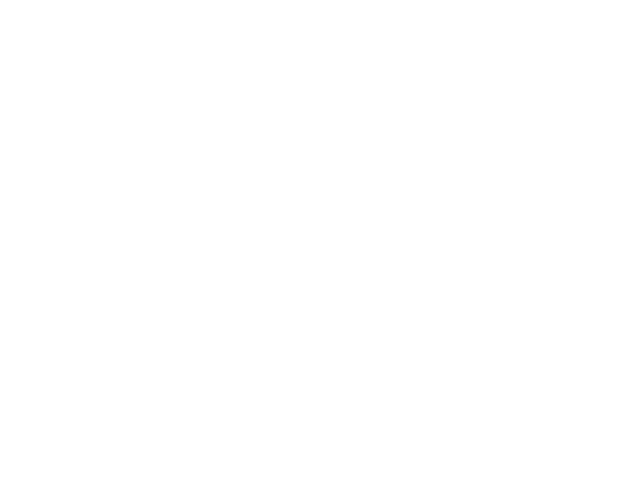

In [14]:
# display(vax[vax.ReportingCountry=='AT'].groupby('Vaccine').apply(vax_agg))

plot_vaccines('AT')


### Germany

COM: Comirnaty – Pfizer/BioNTech
MOD: mRNA-1273 – Moderna
CN : BBIBV-CorV – CNBG
SIN: Coronavac – Sinovac
SPU: Sputnik V - Gamaleya Research Institute
AZ : AZD1222 – AstraZeneca
UNK: UNKNOWN


,FirstDose,SecondDose,UnknownDose,TotalDoses,VaccinatedPercent,Population,NumberDosesReceived,DosesRemaining,DosesReceivedPercent,YearWeek
Vaccine,,,,,,,,,,
AZ,8971922,1521029,0,10492951,10.787876,83166711,12917060,2424109,7.765763,2021-W24
COM,28250232,20472529,0,48722761,33.968197,83166711,52357977,3635216,31.477725,2021-W24
JANSS,1661441,0,0,1661441,1.997724,83166711,2473695,812254,1.487191,2021-W24
MOD,3400724,2176477,0,5577201,4.089045,83166711,6483280,906079,3.897761,2021-W24


<IPython.core.display.Javascript object>


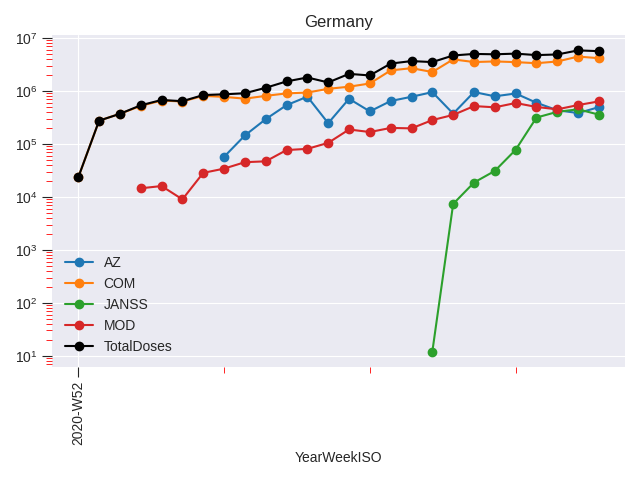

In [7]:

plot_vaccines('DE')


### Netherlands

COM: Comirnaty – Pfizer/BioNTech
MOD: mRNA-1273 – Moderna
CN : BBIBV-CorV – CNBG
SIN: Coronavac – Sinovac
SPU: Sputnik V - Gamaleya Research Institute
AZ : AZD1222 – AstraZeneca
UNK: UNKNOWN


,FirstDose,SecondDose,UnknownDose,TotalDoses,VaccinatedPercent,Population,NumberDosesReceived,DosesRemaining,DosesReceivedPercent,YearWeek
Vaccine,,,,,,,,,,
AZ,8971922,1521029,0,10492951,10.787876,83166711,12917060,2424109,7.765763,2021-W24
COM,28250232,20472529,0,48722761,33.968197,83166711,52357977,3635216,31.477725,2021-W24
JANSS,1661441,0,0,1661441,1.997724,83166711,2473695,812254,1.487191,2021-W24
MOD,3400724,2176477,0,5577201,4.089045,83166711,6483280,906079,3.897761,2021-W24


<IPython.core.display.Javascript object>


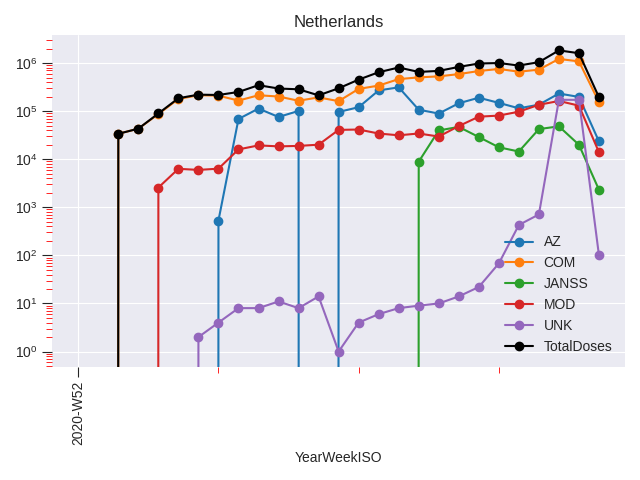

In [8]:
plot_vaccines('NL')


COM: Comirnaty – Pfizer/BioNTech
MOD: mRNA-1273 – Moderna
CN : BBIBV-CorV – CNBG
SIN: Coronavac – Sinovac
SPU: Sputnik V - Gamaleya Research Institute
AZ : AZD1222 – AstraZeneca
UNK: UNKNOWN


,FirstDose,SecondDose,UnknownDose,TotalDoses,VaccinatedPercent,Population,NumberDosesReceived,DosesRemaining,DosesReceivedPercent,YearWeek
Vaccine,,,,,,,,,,
AZ,8971922,1521029,0,10492951,10.787876,83166711,12917060,2424109,7.765763,2021-W24
COM,28250232,20472529,0,48722761,33.968197,83166711,52357977,3635216,31.477725,2021-W24
JANSS,1661441,0,0,1661441,1.997724,83166711,2473695,812254,1.487191,2021-W24
MOD,3400724,2176477,0,5577201,4.089045,83166711,6483280,906079,3.897761,2021-W24


<IPython.core.display.Javascript object>


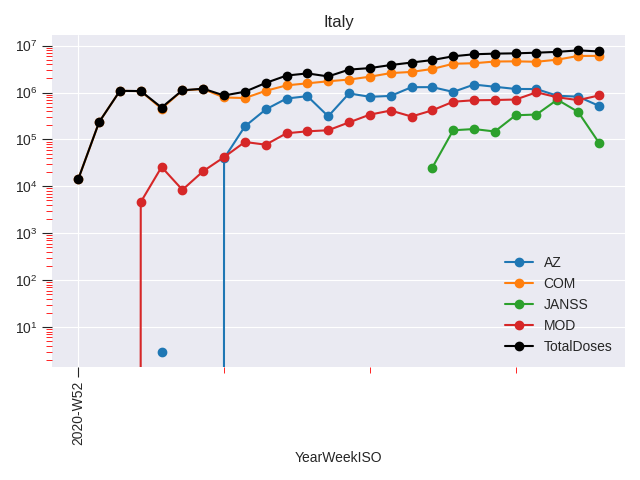

In [9]:
plot_vaccines('IT')

## Selected Countries

In [10]:
SELECTED_COUNTRIES = ('AT', 'DE', 'NL', 'IT')
vax[vax.ReportingCountry.isin(SELECTED_COUNTRIES)].groupby(['ReportingCountry']).apply(vax_agg).sort_values(by='VaccinatedPercent', ascending=False)
# vax[vax.NumberDosesReceived=='']

,FirstDose,SecondDose,UnknownDose,TotalDoses,VaccinatedPercent,Population,NumberDosesReceived,DosesRemaining,DosesReceivedPercent,YearWeek
ReportingCountry,,,,,,,,,,
IT,62373473,28760601,94906,91228980,104.739806,59641488,51161989,-40066991,42.891275,2021-W24
NL,8912097,4822149,341511,14075757,53.158482,17407585,15745241,1669484,45.225231,2021-W25
DE,42284319,24170035,0,66454354,50.842841,83166711,74232012,7777658,44.628440,2021-W24
AT,4476876,2433663,0,6910539,50.295965,8901064,7089695,179156,39.824986,2021-W25


In [11]:
cases = data.cases
print(cases.columns)


Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2020', 'continentExp'],
      dtype='object')


In [12]:
from json import loads
loads(cases.groupby(by='geoId').agg({'countriesAndTerritories':latest}).to_json())['countriesAndTerritories']

{'AT': 'Austria',
 'BE': 'Belgium',
 'BG': 'Bulgaria',
 'CY': 'Cyprus',
 'CZ': 'Czechia',
 'DE': 'Germany',
 'DK': 'Denmark',
 'EE': 'Estonia',
 'EL': 'Greece',
 'ES': 'Spain',
 'FI': 'Finland',
 'FR': 'France',
 'HR': 'Croatia',
 'HU': 'Hungary',
 'IE': 'Ireland',
 'IS': 'Iceland',
 'IT': 'Italy',
 'LI': 'Liechtenstein',
 'LT': 'Lithuania',
 'LU': 'Luxembourg',
 'LV': 'Latvia',
 'MT': 'Malta',
 'NL': 'Netherlands',
 'NO': 'Norway',
 'PL': 'Poland',
 'PT': 'Portugal',
 'RO': 'Romania',
 'SE': 'Sweden',
 'SI': 'Slovenia',
 'SK': 'Slovakia'}